In [26]:
!ls

20221128  ComparisonDecemberFebruaryGd02normalized.png
20221202  ComparisonDecemberFebruaryGd02normalized_short.png
20221212  FebruaryGd02normalized.png
20221226  FebruaryGd02normalized_short.png
20230210  Untitled.ipynb


Kentaro booked the water transparency measurement system on Friday at 15:00.
Yuto & I took several measurements with the instrument.
Here is the list:

- pure water
- no-soak 0.02% Gd water
- no-soak 0.2% Gd water
- 0.02% Gd water (copper-soaking started in Nov 2022)
- 0.2% Gd water (copper-soaking started in Nov 2022)
- 0.2% Gd water (copper-soaking started in Nov 2022) 1/2 diluted
- 0.2% Gd water (copper-soaking started in Nov 2022) 1/4 diluted
- 0.2% Gd water (copper-soaking started in Nov 2022) 1/8 diluted

In [27]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [28]:
dates=[20221128,20221202,20221212,20221226,20230210]
extension=".TXT"

In [29]:
list_files=[[i for i in os.listdir(f"{dates[j]}") if "TXT" in i] for j in range(0,5)]
list_files

[['Gd002_with_copper.TXT',
  'Gd02_with_copper.TXT',
  'pure_water_with_copper.TXT'],
 ['cu_gd002.TXT', 'cu_gd02.TXT', 'cu_water.TXT', 'gd002.TXT', 'gd02.TXT'],
 ['Gd002.TXT', 'Gd02.TXT', 'pure_water.TXT'],
 ['Gd002.TXT',
  'Gd002_with_copper.TXT',
  'Gd02.TXT',
  'Gd02_with_copper.TXT',
  'pure_water.TXT'],
 ['copper_soak_0.125_diluted_Gd02.TXT',
  'copper_soak_0.25_diluted_Gd02.TXT',
  'copper_soak_0.5_diluted_Gd02.TXT',
  'copper_soak__no_diluted_Gd02.TXT',
  'no_soak_Gd002.TXT',
  'no_soak_Gd02.TXT',
  'pure_water.TXT']]

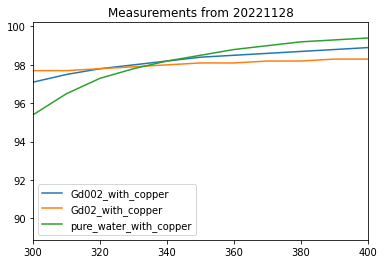

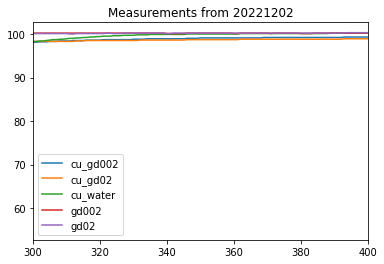

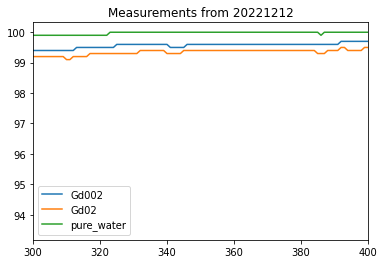

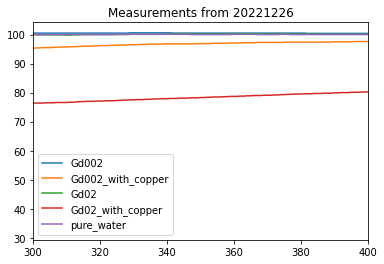

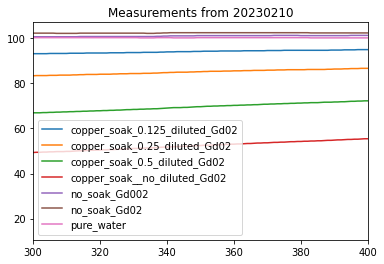

In [30]:
for j in range(0,5):
    plt.figure()
    for i in list_files[j]:
        df=pd.read_csv(f"./{str(dates[j])}/{i}" ,sep="\t")
        Transmittance=list(df["T"])
        Wavelength=list(df["Wavelength"])
        plt.plot(Wavelength,Transmittance, label=i[:-4])
        plt.xlim(300,400)
    plt.title(f"Measurements from {dates[j]}")
    plt.legend()
    plt.show()    

Plot required by Kentaro: 
- transparency (normalized by no-soak Gd water) vs wavelength: tomorrow's 0.2 % and 0.02% in one plot
- transparency (normalized by no-soak Gd water) vs wavelength for 0.2 %:2022 Dec 02, Dec 26, and tomorrow on one plot
- transparency (normalized by no-soak Gd water) vs wavelength for 0.02 %:2022 Dec 02, Dec 26, and tomorrow on one plot
- transparency (normalized by no-soak Gd water, average in ROI) vs time:   0.2 % and 0.02% in one plot

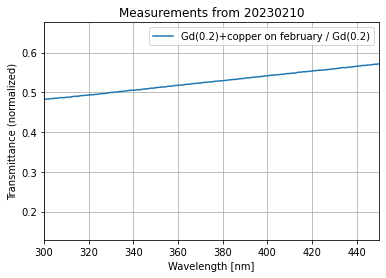

In [49]:
febrary_002='no_soak_Gd002.TXT'
february_02='no_soak_Gd02.TXT'
february_soak='copper_soak__no_diluted_Gd02.TXT'
df1=pd.read_csv(f"./{str(dates[-1])}/{february_soak}" ,sep="\t")
df2=pd.read_csv(f"./{str(dates[-1])}/{february_02}" ,sep="\t")
Transmittance_soak=np.array(df1["T"])
Transmittance_no=np.array(df2["T"])
Wavelength=list(df1["Wavelength"])
plt.plot(Wavelength,Transmittance_soak/Transmittance_no, label="Gd(0.2)+copper on february / Gd(0.2)")
#plt.xlim(300,400)
plt.title(f"Measurements from {dates[-1]}")
plt.legend()
plt.xlabel("Wavelength [nm]")
plt.ylabel("Transmittance (normalized)")
plt.grid()
plt.savefig("./FebruaryGd02normalized.png",dpi=200)
plt.xlim(300,450)
plt.savefig("./FebruaryGd02normalized_short.png",dpi=200)

plt.show()    

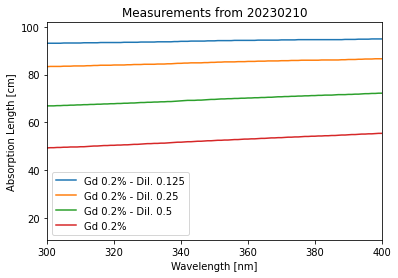

In [54]:
labels=["Gd 0.2% - Dil. 0.125","Gd 0.2% - Dil. 0.25","Gd 0.2% - Dil. 0.5","Gd 0.2%"]
for j in range(4,5):
    intero=0
    plt.figure()
    for i in list_files[j][0:4]:
        df=pd.read_csv(f"./{str(dates[j])}/{i}" ,sep="\t")
        Transmittance=list(df["T"])
        Wavelength=list(df["Wavelength"])
        #Absorption=-(np.log(np.array(Transmittance)*10**(-2)))**(-1)
        #plt.plot(Wavelength,Absorption, label=labels[intero])
        plt.plot(Wavelength,Transmittance, label=labels[intero])
        
        intero+=1
    plt.title(f"Measurements from {dates[j]}")
    plt.legend()
    
    plt.xlabel("Wavelength [nm]")
    plt.ylabel("Absorption Length [cm]")
    plt.savefig("./Transmittance_diluition.png")
    plt.xlim(300,400)
    plt.savefig("./Transmittance_diluition_short.png")
    plt.show()    

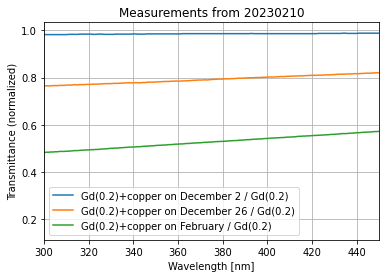

In [48]:
#transparency (normalized by no-soak Gd water) vs wavelength for 0.2 %:2022 Dec 02, Dec 26, and tomorrow on one plot
    
december2_02="gd02.TXT"
december26_02_soak="Gd02_with_copper.TXT"
december26_02="Gd02.TXT"
december2_02_soak="cu_gd02.TXT"
february_02='no_soak_Gd02.TXT'
february_soak='copper_soak__no_diluted_Gd02.TXT'

df_february_soak=pd.read_csv(f"./{str(dates[-1])}/{february_soak}" ,sep="\t")
df_february=pd.read_csv(f"./{str(dates[-1])}/{february_02}" ,sep="\t")

df_dec2_soak=pd.read_csv(f"./20221202/{december2_02_soak}" ,sep="\t")
df_dec2=pd.read_csv(f"./20221202/{december2_02}" ,sep="\t")

df_dec26_soak=pd.read_csv(f"./20221226/{december26_02_soak}" ,sep="\t")
df_dec26=pd.read_csv(f"./20221226/{december26_02}" ,sep="\t")


Transmittance_soak_february=np.array(df_february_soak["T"])
Transmittance_no_february=np.array(df_february["T"])

Transmittance_soak_dec2=np.array(df_dec2_soak["T"])
Transmittance_no_dec2=np.array(df_dec2["T"])

Transmittance_soak_dec26=np.array(df_dec26_soak["T"])
Transmittance_no_dec26=np.array(df_dec26["T"])


Wavelength=list(df_february_soak["Wavelength"])

plt.plot(Wavelength,Transmittance_soak_dec2/Transmittance_no_dec2, label="Gd(0.2)+copper on December 2 / Gd(0.2)")
plt.plot(Wavelength,Transmittance_soak_dec26/Transmittance_no_dec26, label="Gd(0.2)+copper on December 26 / Gd(0.2)")
plt.plot(Wavelength,Transmittance_soak_february/Transmittance_no_february, label="Gd(0.2)+copper on February / Gd(0.2)")

#plt.xlim(300,400)
plt.title(f"Measurements from {dates[-1]}")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Transmittance (normalized)")
plt.legend()
plt.grid()
plt.savefig("./ComparisonDecemberFebruaryGd02normalized.png",dpi=200)
plt.xlim(300,450)
plt.savefig("./ComparisonDecemberFebruaryGd02normalized_short.png",dpi=200)

plt.show()    

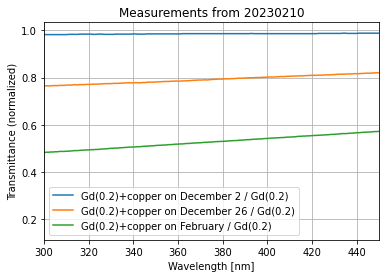

In [47]:
#transparency (normalized by no-soak Gd water) vs wavelength for 0.2 %:2022 Dec 02, Dec 26, and tomorrow on one plot
    
december2_02="gd02.TXT"
december26_02_soak="Gd02_with_copper.TXT"
december26_02="Gd02.TXT"
december2_02_soak="cu_gd02.TXT"
#february_02='no_soak_Gd02.TXT'
#february_soak='copper_soak__no_diluted_Gd02.TXT'

df_february_soak=pd.read_csv(f"./{str(dates[-1])}/{february_soak}" ,sep="\t")
df_february=pd.read_csv(f"./{str(dates[-1])}/{february_02}" ,sep="\t")

df_dec2_soak=pd.read_csv(f"./20221202/{december2_02_soak}" ,sep="\t")
df_dec2=pd.read_csv(f"./20221202/{december2_02}" ,sep="\t")

df_dec26_soak=pd.read_csv(f"./20221226/{december26_02_soak}" ,sep="\t")
df_dec26=pd.read_csv(f"./20221226/{december26_02}" ,sep="\t")


Transmittance_soak_february=np.array(df_february_soak["T"])
Transmittance_no_february=np.array(df_february["T"])

Transmittance_soak_dec2=np.array(df_dec2_soak["T"])
Transmittance_no_dec2=np.array(df_dec2["T"])

Transmittance_soak_dec26=np.array(df_dec26_soak["T"])
Transmittance_no_dec26=np.array(df_dec26["T"])


Wavelength=list(df_february_soak["Wavelength"])

plt.plot(Wavelength,Transmittance_soak_dec2/Transmittance_no_dec2, label="Gd(0.2)+copper on December 2 / Gd(0.2)")
plt.plot(Wavelength,Transmittance_soak_dec26/Transmittance_no_dec26, label="Gd(0.2)+copper on December 26 / Gd(0.2)")
plt.plot(Wavelength,Transmittance_soak_february/Transmittance_no_february, label="Gd(0.2)+copper on February / Gd(0.2)")

#plt.xlim(300,400)
plt.title(f"Measurements from {dates[-1]}")
plt.xlabel("Wavelength [nm]")
plt.ylabel("Transmittance (normalized)")
plt.legend()
plt.grid()
plt.savefig("./ComparisonDecemberFebruaryGd02normalized.png",dpi=200)
plt.xlim(300,450)
plt.savefig("./ComparisonDecemberFebruaryGd02normalized_short.png",dpi=200)

plt.show()    

In [35]:
index_300 = list(Wavelength).index(300)
index_400 = list(Wavelength).index(400)
print(index_300,index_400)

300 200


In [36]:
av02dec=np.mean(Transmittance_soak_dec2[200:300]/Transmittance_no_dec2[200:300])
av26dec=np.mean(Transmittance_soak_dec26[200:300]/Transmittance_no_dec26[200:300])
avfeb=np.mean(Transmittance_soak_february[200:300]/Transmittance_no_february[200:300])

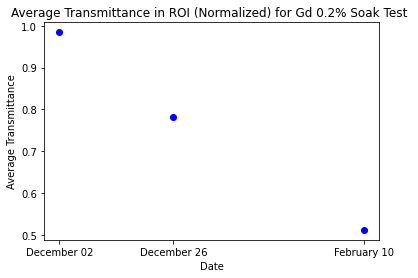

In [55]:
plt.figure()
plt.scatter(1,av02dec,label="December 02 (Gd0.2%+Copper)",color="Blue")
plt.scatter(2.5,av26dec,label="December 26 (Gd0.02%+Copper)",color="Blue")
plt.scatter(5,avfeb,label="February 10 (Gd0.02%+Copper)",color="Blue")
plt.xticks([1,2.5,5],["December 02","December 26","February 10"])
plt.xlabel("Date")
plt.ylabel("Average Transmittance")
plt.title("Average Transmittance in ROI (Normalized) for Gd 0.2% Soak Test ")

plt.savefig("./TransmittanceAverage02.png",dpi=200)
plt.show()